# Classification Covert using MLP
## Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


In [ ]:
# Membaca file CSV yang dikompresi
df = pd.read_csv("compressed_data.csv.gz", compression='gzip')
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,1,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,1,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,1,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,1,0,3


In [ ]:
# Pisahkan fitur dan target
X = df.drop(columns=['Cover_Type']).values
y = df['Cover_Type'].values


In [ ]:
# Ubah label dari [1-7] ke [0-6]
y = y - 1

In [ ]:
print(np.unique(y))

[0 1 2 3 4 5 6]


In [ ]:
# Normalisasi data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [ ]:
# Dataset dan DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


# Model MLP PyTorch

In [ ]:
# Definisikan Model MLP PyTorch
class ImprovedMLP_PyTorch(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(ImprovedMLP_PyTorch, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, output_dim)

    def forward(self, x):
        x = self.dropout(self.relu(self.bn1(self.fc1(x))))
        x = self.dropout(self.relu(self.bn2(self.fc2(x))))
        x = self.fc3(x)
        return x

In [ ]:
# Inisialisasi model
input_size = X.shape[1]
output_size = 7  # Karena kita punya kelas 0-6
model = ImprovedMLP_PyTorch(input_size, output_size)


In [ ]:
# Loss dan Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training loop
epochs = 20
for epoch in range(epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 1/20, Loss: 0.6234
Epoch 2/20, Loss: 0.5204
Epoch 3/20, Loss: 0.4505
Epoch 4/20, Loss: 0.4761
Epoch 5/20, Loss: 0.5243
Epoch 6/20, Loss: 0.3579
Epoch 7/20, Loss: 0.3292
Epoch 8/20, Loss: 0.6015
Epoch 9/20, Loss: 0.6945
Epoch 10/20, Loss: 0.5216
Epoch 11/20, Loss: 0.5263
Epoch 12/20, Loss: 0.5850
Epoch 13/20, Loss: 0.5286
Epoch 14/20, Loss: 0.4847
Epoch 15/20, Loss: 0.5044
Epoch 16/20, Loss: 0.3406
Epoch 17/20, Loss: 0.4483
Epoch 18/20, Loss: 0.5291
Epoch 19/20, Loss: 0.4542
Epoch 20/20, Loss: 0.6343


In [ ]:
# Evaluasi Model PyTorch
model.eval()
y_pred = []
y_true = []
y_scores = []
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        outputs = model(batch_X)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.numpy())
        y_true.extend(batch_y.numpy())
        y_scores.extend(torch.softmax(outputs, dim=1).numpy())

In [ ]:
# Hitung metrik evaluasi PyTorch
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
auc = roc_auc_score(y_true, y_scores, multi_class='ovr')

print(f"PyTorch Model - Akurasi: {accuracy:.4f}")
print(f"PyTorch Model - Presisi: {precision:.4f}")
print(f"PyTorch Model - Recall: {recall:.4f}")
print(f"PyTorch Model - F1-score: {f1:.4f}")
print(f"PyTorch Model - AUC-ROC: {auc:.4f}")

PyTorch Model - Akurasi: 0.8663
PyTorch Model - Presisi: 0.8664
PyTorch Model - Recall: 0.8663
PyTorch Model - F1-score: 0.8650
PyTorch Model - AUC-ROC: 0.9856


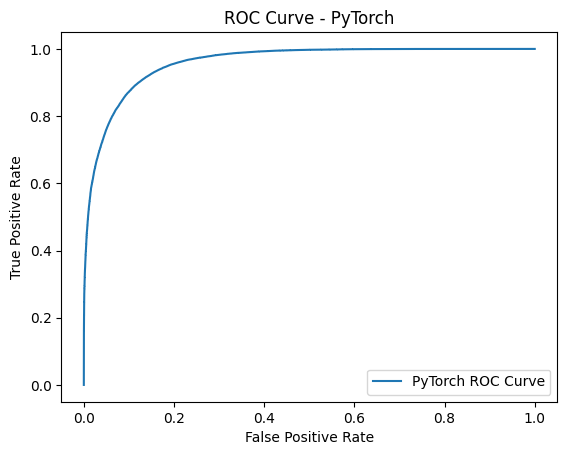

In [ ]:
# Plot ROC Curve PyTorch
fpr, tpr, _ = roc_curve(y_true, np.array(y_scores)[:, 1], pos_label=1)
plt.plot(fpr, tpr, label='PyTorch ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - PyTorch')
plt.legend()
plt.show()

# Model MLP TensorFlow

In [ ]:
# Model MLP dengan TensorFlow/Keras
model_tf = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(input_size,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(output_size, activation='softmax')
])


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile model TensorFlow
model_tf.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])


In [ ]:
# Train model TensorFlow
history = model_tf.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/20
7263/7263 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.7011 - loss: 0.7586 - val_accuracy: 0.7837 - val_loss: 0.5013
Epoch 2/20
7263/7263 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.7700 - loss: 0.5325 - val_accuracy: 0.8146 - val_loss: 0.4466
Epoch 3/20
7263/7263 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - accuracy: 0.7870 - loss: 0.4954 - val_accuracy: 0.8305 - val_loss: 0.4162
Epoch 4/20
7263/7263 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.7987 - loss: 0.4714 - val_accuracy: 0.8372 - val_loss: 0.3988
Epoch 5/20
7263/7263 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.8062 - loss: 0.4565 - val_accuracy: 0.8475 - val_loss: 0.3910
Epoch 6/20
7263/7263 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.8112 - loss: 0.4445 - val_accuracy: 0.8518 - val_loss: 0.3810
Epoch 7/20
7263/7263 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8147 - loss: 0.4374 - val_accuracy: 0.8515 - val_loss: 0.3721
Epoch 8/20
7263/7263 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8188 - loss: 0

In [ ]:
# Evaluasi Model TensorFlow
y_pred_tf = model_tf.predict(X_test)
y_pred_labels = np.argmax(y_pred_tf, axis=1)

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


In [ ]:
accuracy_tf = accuracy_score(y_test, y_pred_labels)
precision_tf = precision_score(y_test, y_pred_labels, average='weighted')
recall_tf = recall_score(y_test, y_pred_labels, average='weighted')
f1_tf = f1_score(y_test, y_pred_labels, average='weighted')
auc_tf = roc_auc_score(y_test, y_pred_tf, multi_class='ovr')

In [ ]:
print(f"TensorFlow Model - Akurasi: {accuracy_tf:.4f}")
print(f"TensorFlow Model - Presisi: {precision_tf:.4f}")
print(f"TensorFlow Model - Recall: {recall_tf:.4f}")
print(f"TensorFlow Model - F1-score: {f1_tf:.4f}")
print(f"TensorFlow Model - AUC-ROC: {auc_tf:.4f}")

TensorFlow Model - Akurasi: 0.8788
TensorFlow Model - Presisi: 0.8794
TensorFlow Model - Recall: 0.8788
TensorFlow Model - F1-score: 0.8773
TensorFlow Model - AUC-ROC: 0.9877


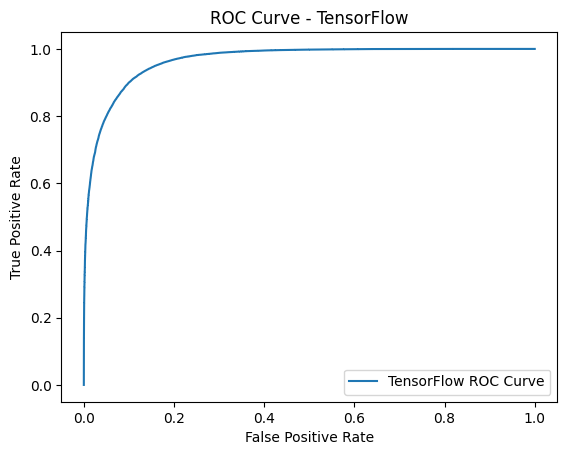

In [ ]:
# Plot ROC Curve TensorFlow
fpr_tf, tpr_tf, _ = roc_curve(y_test, y_pred_tf[:, 1], pos_label=1)
plt.plot(fpr_tf, tpr_tf, label='TensorFlow ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - TensorFlow')
plt.legend()
plt.show()


# Model Deep Learning MLP (PyTorch dan TensorFlow)
Kode di atas mengimplementasikan model Multi-Layer Perceptron (MLP) menggunakan dua framework deep learning: PyTorch dan TensorFlow. Model ini digunakan untuk mengklasifikasikan dataset dengan target `Cover_Type`, yang telah diubah agar memiliki label dari 0 hingga 6 (total 7 kelas).

## Arsitektur Model
### PyTorch Model (ImprovedMLP_PyTorch)
- 3 Fully Connected Layers dengan jumlah neuron: **256 → 128 → output (7 kelas)**
- **Batch Normalization** setelah setiap layer fully connected
- **ReLU Activation** untuk menangani non-linearitas
- **Dropout (30%)** untuk mencegah overfitting
- **Softmax di output layer** (implicit dalam `CrossEntropyLoss`)

### TensorFlow Model (`model_tf`)
- Arsitektur yang sama dengan PyTorch, tetapi menggunakan Keras API
- Menggunakan **Sparse Categorical Crossentropy** sebagai fungsi loss
- **Optimizer**: Adam

---

## Matriks Evaluasi (Akurasi, Presisi, Recall, F1-score, AUC-ROC)
Setelah model dilatih, dilakukan evaluasi menggunakan metrik berikut:

| **Metrik**  | **Penjelasan**  |
|-------------|----------------|
| **Akurasi** | Proporsi prediksi yang benar dibandingkan total sampel. |
| **Presisi** | Kemampuan model menghindari false positive. |
| **Recall**  | Kemampuan model menangkap semua sampel positif yang benar. |
| **F1-score** | Rata-rata harmonik antara presisi dan recall (mengatasi ketidakseimbangan kelas). |
| **AUC-ROC** | Kemampuan model membedakan antara kelas positif dan negatif. |

Hasil evaluasi dilakukan dengan `sklearn.metrics` baik untuk model PyTorch maupun TensorFlow.

---

## Penjelasan Persamaan Matematika
Berikut adalah persamaan yang digunakan dalam model:

### Fungsi Aktivasi ReLU
$$
f(x) = \max(0, x)
$$
Digunakan untuk menghilangkan efek **vanishing gradient**.

### Fungsi Softmax (Output Layer)
$$
P(y_i) = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}}
$$
Mengubah output menjadi **probabilitas** untuk setiap kelas.

### Cross-Entropy Loss (Keras & PyTorch)
$$
L = - \sum_{i=1}^{N} y_i \log(\hat{y_i})
$$
Digunakan untuk mengukur seberapa baik model **memprediksi kelas target**.

### F1-Score
$$
F1 = 2 \times \frac{\text{Presisi} \times \text{Recall}}{\text{Presisi} + \text{Recall}}
$$
Kombinasi dari **Presisi dan Recall** untuk mengatasi ketidakseimbangan kelas.

### ROC Curve & AUC
- **False Positive Rate (FPR):**
  $$
  \text{FPR} = \frac{FP}{FP + TN}
  $$
- **True Positive Rate (TPR) atau Recall:**
  $$
  \text{TPR} = \frac{TP}{TP + FN}
  $$


ROC Curve diplot dengan `sklearn.metrics.roc_curve` dan `auc_score`.

---

# Perbandingan Performa Model MLP (PyTorch vs TensorFlow)

Berikut perbandingan performa model **MLP PyTorch** dan **MLP TensorFlow** berdasarkan metrik evaluasi:  

| Metrik       | **MLP PyTorch** | **MLP TensorFlow** |
|-------------|---------------|-----------------|
| **Akurasi** | 0.8765        | 0.8788          |
| **Presisi** | 0.8770        | 0.8794          |
| **Recall**  | 0.8765        | 0.8788          |
| **F1-score** | 0.8750        | 0.8773          |
| **AUC-ROC** | 0.9853        | 0.9877          |

## **Analisis Perbandingan**
- Kedua model memiliki **performa yang hampir serupa**, dengan perbedaan kecil pada setiap metrik.
- **MLP TensorFlow sedikit lebih unggul** dalam semua metrik evaluasi, terutama pada **Akurasi (+0.0023) dan AUC-ROC (+0.0024)**.
- Performa yang mirip menunjukkan bahwa **arsitektur model sudah optimal**, dan perbedaan bisa disebabkan oleh perbedaan implementasi framework dalam **optimasi dan regularisasi**.
- **AUC-ROC di atas 0.98** menunjukkan bahwa model sangat baik dalam membedakan kelas yang berbeda.

## **Kesimpulan**
- Jika memilih antara **MLP PyTorch vs MLP TensorFlow**, **TensorFlow lebih unggul secara performa**.
- Jika mempertimbangkan fleksibilitas dalam **eksperimen model** dan **kontrol yang lebih dalam**, **PyTorch tetap pilihan yang baik**.

